<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Patrick Victorino Miranda.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [1]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 17.0MB/s]


In [24]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())
df

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801
5,2023-01-06,148.0,191.0,47.647219,2.362449,Orgânico,Mobile,9,2.559353,6.773194
6,2023-01-07,150.0,197.0,49.036840,2.662313,Direto,Mobile,4,2.501274,5.318291
7,2023-01-08,146.0,202.0,47.801333,2.356262,Pago,Desktop,9,2.693574,5.666004
8,2023-01-09,137.0,284.0,46.140695,2.651792,Social,Desktop,2,2.714130,6.134571
9,2023-01-10,131.0,254.0,46.729001,2.569731,Social,Desktop,10,2.698200,5.968601


## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

Abaixo e possivel explorar o dados fornecidos atravez de gráficos interativos:

Lembrando que e possivel dar zoom para data desejada. E que tambem e possivel selecionar o dados a serem exibidos, pelo filtro à direita do grafico

Os em valor total:

In [22]:
df_visualizacao = df
time=df_visualizacao['Data']

#Setando valores
fig = go.Figure(data=[
    go.Bar(name='Visitantes Únicos', x=time, y=df_visualizacao['Visitantes Únicos']),
    go.Bar(name='Sessões', x=time, y=df_visualizacao['Sessões']),
    go.Bar(name='Páginas por Sessão', x=time, y=df_visualizacao['Páginas por Sessão']),
    go.Bar(name='Eventos', x=time, y=df_visualizacao['Eventos']),
    go.Bar(name='Tempo Médio de Sessão (minutos)', x=time, y=df_visualizacao['Tempo Médio de Sessão (minutos)'])
])
# Plotando grafico
fig.update_layout(barmode='group')
fig.show()

Os em %:

In [23]:
df_visualizacao = df
time=df_visualizacao['Data']

#Setando valores
fig = go.Figure(data=[
    go.Bar(name='Taxa de Rejeição (%)', x=time, y=df_visualizacao['Taxa de Rejeição (%)']),
    go.Bar(name='Taxa de Conversão (%)', x=time, y=df_visualizacao['Taxa de Conversão (%)']),
])
# Plotando grafico
fig.update_layout(barmode='group')
fig.show()

Correlação entre os dados:

In [4]:
# Definição de função para calcular e plotar correlações
def calcular_correlacoes(df):
    correlation_matrix = df.select_dtypes(include=['number']).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação')
    plt.show()

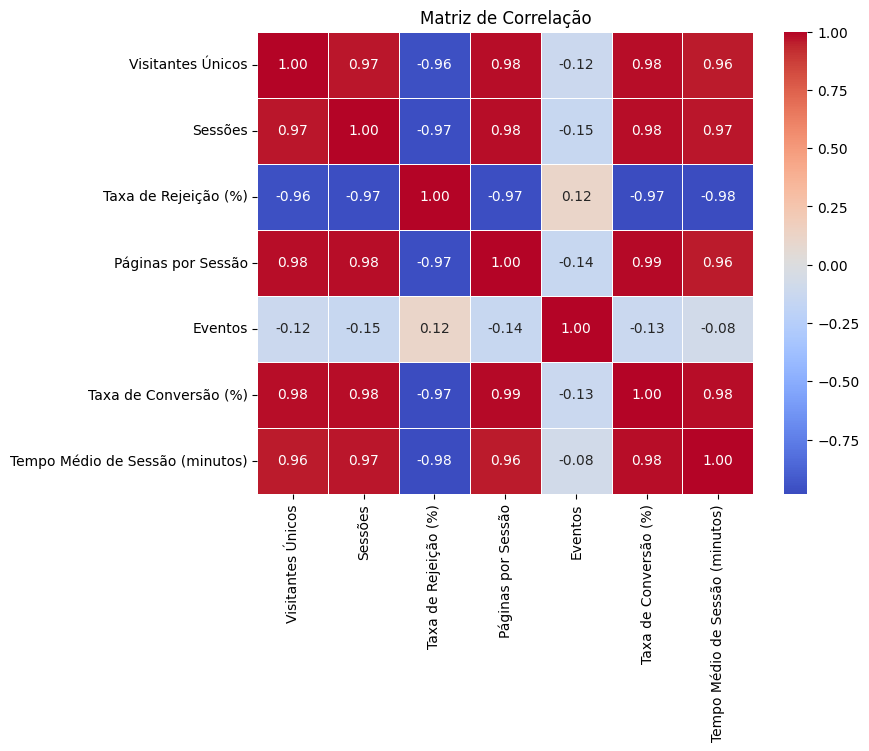

In [5]:
# Chamando a função
calcular_correlacoes(df)

Assim ao analisar os graficos e amatriz de corralção, e possivel observar que as variaveis que mais afetam positivamente a conversão são:

Os visitantes unicos, as sessões, as paginas por sessão, e o tempo medio da sessão.

Já negativamente vale mencionar a taxa de Rejeição como o principal, mas tempo que levar em conta que ela e o contrario da taxa de conversão, então esse ja era um resultado esperado.

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

Nesse caso, por questões de tempo, sera realizada 1 iteração apenas

In [62]:
# Definindo função para realizar Simulação de Monte Carlo:
def monte_carlo():
  #definindo modificador aleatorio
  media_visitantes_unicos = df['Visitantes Únicos'].mean()
  media_sessões = df['Sessões'].mean()
  media_paginas_por_sessão = df['Páginas por Sessão'].mean()
  media_eventos = df['Eventos'].mean()
  media_tempo_sessao = df['Tempo Médio de Sessão (minutos)'].mean()
  media_taxa_convercao = df['Taxa de Conversão (%)'].mean()


  multiplicador = np.random.uniform(-0.1, 0.1)
  nova_media_visitantes_unicos = media_visitantes_unicos + (media_visitantes_unicos - media_visitantes_unicos*multiplicador)
  nova_media_sessões = media_sessões + (media_sessões - media_sessões*multiplicador)
  nova_media_paginas_por_sessão = media_paginas_por_sessão + (media_paginas_por_sessão - media_paginas_por_sessão*multiplicador)
  nova_media_tempo_sessao = media_tempo_sessao + (media_tempo_sessao - media_tempo_sessao*multiplicador)
  nova_media_eventos = media_eventos + (media_eventos - media_eventos*multiplicador)
  nova_taxa_convercao =  media_taxa_convercao + ( media_taxa_convercao -  media_taxa_convercao*multiplicador)

  return  nova_media_visitantes_unicos,nova_media_sessões,nova_media_paginas_por_sessão,nova_media_tempo_sessao,nova_media_eventos,nova_taxa_convercao




In [67]:
#resultado da simulação
resultado = monte_carlo()
print("resultados simulação:")
print("visitantes_unicos",resultado[0])
print("sessões",resultado[1])
print("paginas_por_sessão",resultado[2])
print("media_tempo_sessao",resultado[3])
print("eventos",resultado[4])
print("taxa_convercao",resultado[5])


resultados simulação:
visitantes_unicos 573.7939613674996
sessões 856.4036836505071
paginas_por_sessão 7.63614596791604
media_tempo_sessao 19.142050704072894
eventos 10.098875343970825
taxa_convercao 8.573814943550126


Assim, com base nos resultados fornecidos pela simulação de Monte Carlo, a empresa pode prever o impacto que uma mudança na página pode ter. Auxiliando ela na tomada de decisão, uma vez que pode ajudar ela a escolher qual estratégia de redesign aplicar. Além de auxiliar ela a entender se vale o risco de um redesign na página.

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

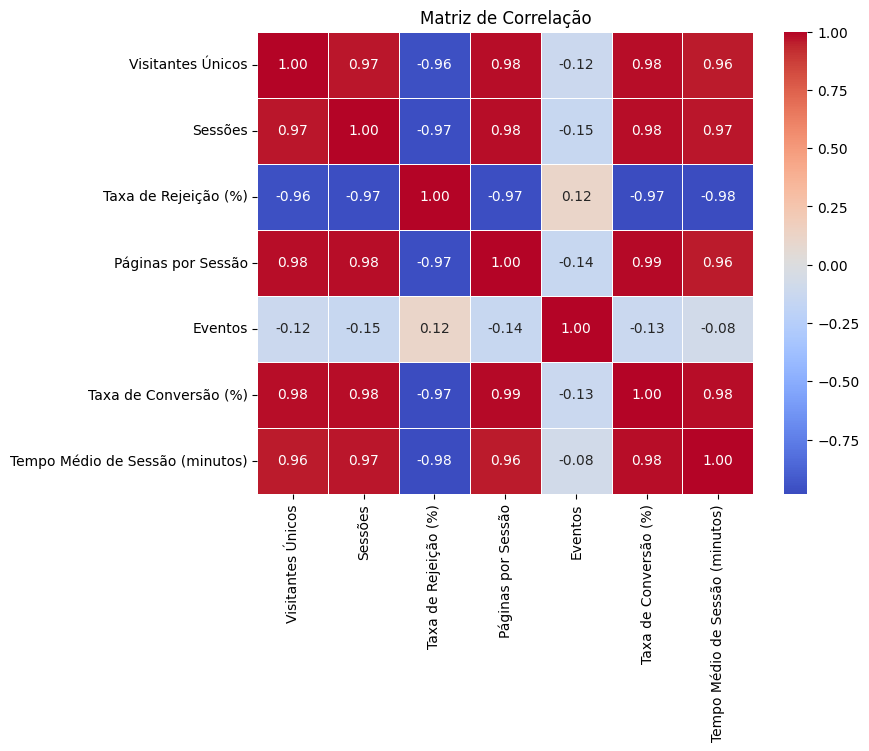

In [68]:
calcular_correlacoes(df)

Com base no calculo realizado para matriz de correlação podemos observar o quanto cada variavel afeta a taxa de conversão.

Sendo as principais:

visitantes unicos, sessoes e tempo medio de sessao com 0.98

e paginas por sessão com 0.99

Sendo possivel observar a quais fatores a taxa de conversão e mais sensivel

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.